# **KAN COMPARE** #


#Step 1: Installing Hugging Face transformers and torchinfo

In [1]:
!pip  install torchinfo torchmetrics accelerate wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (12

# Step 2: Mount Google Drive

In [2]:
#@markdown # Connect Google Drive
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
import os

def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
Shared_Drive = "" #@param {type:"string"}
#@markdown - Leave empty if you're not using a shared drive

print("Connecting...")
drive.mount('/content/gdrive')

if Shared_Drive!="" and os.path.exists("/content/gdrive/Shareddrives"):
  mainpth="Shareddrives/"+Shared_Drive
else:
  mainpth="MyDrive"

clear_output()
inf('\u2714 Done','success', '50px')

#@markdown ---

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [3]:
%cd /content/gdrive/MyDrive/FAIR/2024/


/content/gdrive/MyDrive/FAIR/2024


In [ ]:
!wget  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2024-06-11 09:42:39--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  45.2MB/s    in 3.8s    

2024-06-11 09:42:43 (43.0 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!tar -xvzf ./cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./cifar-10-batches-py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./cifar-10-batches-py/test_batch
./cifar-10-batches-py/data_batch_3
./cifar-10-batches-py/data_batch_2
./cifar-10-batches-py/data_batch_5
./cifar-10-batches-py/data_batch_1
./cifar-10-batches-py/data_batch_4
./cifar-10-batches-py/batches.meta


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
import torchvision.datasets as datasets

import math
import wandb


In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batchSize = 4

dataset = torchvision.datasets.CIFAR10(root="/content/gdrive/MyDrive/FAIR/2024/", train=True, download=False, transform=transform) #transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root="/content/gdrive/MyDrive/FAIR/2024/", train=False, download=False, transform=transform) #transforms.ToTensor())

trainset, validateset = random_split(dataset, [45000, 5000])

trainloader = DataLoader(trainset, batchSize, shuffle=True)
validateloader = DataLoader(validateset, batchSize, shuffle=True)
testloader = DataLoader(testset, batch_size=batchSize, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

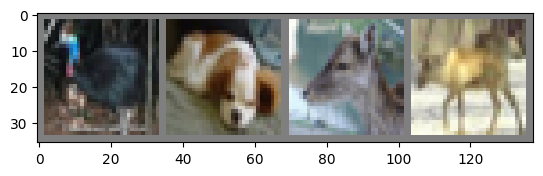

bird  dog   deer  deer 


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batchSize)))

In [8]:
class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                # torch.nn.init.constant_(self.spline_scaler, self.scale_spline)
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        """
        Compute the B-spline bases for the given input tensor.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).

        Returns:
            torch.Tensor: B-spline bases tensor of shape (batch_size, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = (
            self.grid
        )  # (in_features, grid_size + 2 * spline_order + 1)
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        """
        Compute the coefficients of the curve that interpolates the given points.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).
            y (torch.Tensor): Output tensor of shape (batch_size, in_features, out_features).

        Returns:
            torch.Tensor: Coefficients tensor of shape (out_features, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(
            0, 1
        )  # (in_features, batch_size, grid_size + spline_order)
        B = y.transpose(0, 1)  # (in_features, batch_size, out_features)
        solution = torch.linalg.lstsq(
            A, B
        ).solution  # (in_features, grid_size + spline_order, out_features)
        result = solution.permute(
            2, 0, 1
        )  # (out_features, in_features, grid_size + spline_order)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.view(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.view(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)  # (batch, in, coeff)
        splines = splines.permute(1, 0, 2)  # (in, batch, coeff)
        orig_coeff = self.scaled_spline_weight  # (out, in, coeff)
        orig_coeff = orig_coeff.permute(1, 2, 0)  # (in, coeff, out)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)  # (in, batch, out)
        unreduced_spline_output = unreduced_spline_output.permute(
            1, 0, 2
        )  # (batch, in, out)

        # sort each channel individually to collect data distribution
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        """
        Compute the regularization loss.

        This is a dumb simulation of the original L1 regularization as stated in the
        paper, since the original one requires computing absolutes and entropy from the
        expanded (batch, in_features, out_features) intermediate tensor, which is hidden
        behind the F.linear function if we want an memory efficient implementation.

        The L1 regularization is now computed as mean absolute value of the spline
        weights. The authors implementation also includes this term in addition to the
        sample-based regularization.
        """
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = KANLinear(16 * 5 * 5, 120)
        self.fc2 = KANLinear(120, 84)
        self.fc3 = KANLinear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [14]:
# Setup device GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}")

Training on device: cpu


In [10]:


net = Net()
net.to(device)
epochs =20

### Wandb tracking

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [10]:

# Initialize wandb
wandb.init(project="fair2024", entity="toandang76")

# Configurations and hyperparameters tracked by wandb
wandb.config = {
  "learning_rate": 0.001,
  "epochs": epochs,
  "batch_size": len(trainloader.dataset) / len(trainloader)
}

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 37


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
%%time
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device) #data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
          avg_loss = running_loss / 2000
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {avg_loss:.3f}')
          wandb.log({"epoch": epoch + 1, "loss": avg_loss})
          running_loss = 0.0

print('Finished Training')
wandb.finish()

[1,  2000] loss: 2.303
[1,  4000] loss: 2.302
[1,  6000] loss: 2.301
[1,  8000] loss: 2.110
[1, 10000] loss: 1.817
[2,  2000] loss: 1.624
[2,  4000] loss: 1.570
[2,  6000] loss: 1.532
[2,  8000] loss: 1.485
[2, 10000] loss: 1.433
[3,  2000] loss: 1.351
[3,  4000] loss: 1.350
[3,  6000] loss: 1.344
[3,  8000] loss: 1.309
[3, 10000] loss: 1.292
[4,  2000] loss: 1.216
[4,  4000] loss: 1.229
[4,  6000] loss: 1.206
[4,  8000] loss: 1.207
[4, 10000] loss: 1.178
[5,  2000] loss: 1.121
[5,  4000] loss: 1.108
[5,  6000] loss: 1.106
[5,  8000] loss: 1.107
[5, 10000] loss: 1.126
[6,  2000] loss: 1.041
[6,  4000] loss: 1.021
[6,  6000] loss: 1.054
[6,  8000] loss: 1.067
[6, 10000] loss: 1.041
[7,  2000] loss: 0.962
[7,  4000] loss: 0.996
[7,  6000] loss: 0.995
[7,  8000] loss: 0.985
[7, 10000] loss: 1.004
[8,  2000] loss: 0.905
[8,  4000] loss: 0.934
[8,  6000] loss: 0.945
[8,  8000] loss: 0.930
[8, 10000] loss: 0.979
[9,  2000] loss: 0.868
[9,  4000] loss: 0.881
[9,  6000] loss: 0.910
[9,  8000] 

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
loss,██▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁
epoch,20
loss,0.71612


CPU times: user 39min 54s, sys: 21 s, total: 40min 15s
Wall time: 41min 6s


In [14]:
PATH = './kan_cifar_net-20.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# dataiter = iter(testloader)
# # test_dt = next(dataiter).to(device)
# images, labels = next(dataiter)
with torch.no_grad():
  for data_test in testloader:
    images, labels = data_test[0].to(device),data_test[1].to(device)
    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [15]:
def predictImage(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)

    return pred[0].item()

###  Load model

In [17]:
#Load model
PATH = './kan_cifar_net.pth'
net = Net()
net = net.to(device)
net.load_state_dict(torch.load(PATH,map_location=torch.device(device)))

<All keys matched successfully>

In [18]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): KANLinear(
    (base_activation): SiLU()
  )
  (fc2): KANLinear(
    (base_activation): SiLU()
  )
  (fc3): KANLinear(
    (base_activation): SiLU()
  )
)

In [19]:
outputs = net(images)

In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   dog   cat   deer 


In [22]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device),data[1].to(device) #data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [21]:
correct = 0
total = 0
f1_test=0
precision_test=0
recall_test=0
i=0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device),data[1].to(device) #data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        f1_test += (f1_score(labels, predicted, average='weighted'))
        precision_test += (precision_score(labels, predicted, average='weighted'))
        recall_test += (recall_score(labels, predicted, average='weighted'))
        i+=1

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'F1 score: {100 * f1_test/i}')
print(f'Precision: {100 * precision_test/i}')
print(f'Recall: {100 *recall_test/i}')


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificat

Accuracy of the network on the 10000 test images: 61 %
F1 score: 61.71095238095243
Precision: 64.53666666666662
Recall: 61.73


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [29]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device),data[1].to(device) #data
        # calculate outputs by running images through the network
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 59.0 %
Accuracy for class: car   is 81.1 %
Accuracy for class: bird  is 43.6 %
Accuracy for class: cat   is 46.2 %
Accuracy for class: deer  is 56.2 %
Accuracy for class: dog   is 49.6 %
Accuracy for class: frog  is 69.2 %
Accuracy for class: horse is 65.7 %
Accuracy for class: ship  is 77.5 %
Accuracy for class: truck is 69.2 %


In [45]:
predictions = np.empty((0, len(testset)), np.int32)
actualValues = np.empty((0, len(testset)), np.int32)

with torch.no_grad():
  for data in testloader:
        images, labels = data[0].to(device),data[1].to(device) #data
        # calculate outputs by running images through the network
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class

        # for label, prediction in zip(labels, predictions):
        f1_test = f1_score(labels.to("cpu"), predictions.to("cpu"), average='weighted')
        #     if label == prediction:
        #         correct_pred[classes[label]] += 1
        #     total_pred[classes[label]] += 1
print(f1_test)


0.75


In [30]:
predictions = np.empty((0, len(testset)), np.int32)
actualValues = np.empty((0, len(testset)), np.int32)

with torch.no_grad():
    for i in range(0, len(testset)):
        testImg, testLabel = testset[i]
        testImg = testImg.unsqueeze(0)
        predictedValue = predictImage(testImg, net)

        predictions = np.append(predictions, predictedValue)
        actualValues = np.append(actualValues, testLabel)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1, 3, 32, 32]

In [26]:
confusionMatrix = confusion_matrix(actualValues, predictions)

confusionMatrixDf = pd.DataFrame(confusionMatrix, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(confusionMatrixDf, annot=True, cmap='Blues', fmt='g')

NameError: name 'actualValues' is not defined

In [3]:
#Sample data for illustration purposes
epochs = list(range(1, 11))  # Epochs 1 to 10

mlp_losses = [1.714,1.275, 1.139, 1.038, 0.998, 0.952,  0.898, 0.857, 0.849, 0.815]
cnn_losses = [2.035, 1.215, 1.130, 1.060, 1.020, 1.003, 0.977, 0.912, 0.884, 0.838]
kan_losses = [2.303, 1.474, 1.397, 1.307, 1.227, 1.154, 1.028, 1.004, 0.945, 0.851]


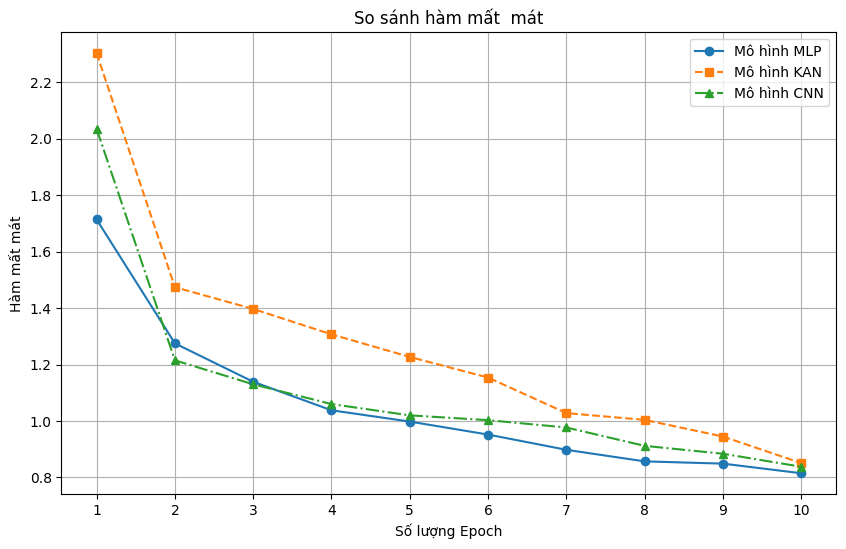

In [5]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 6))

# Plotting each model's loss per epoch
plt.plot(epochs, mlp_losses, marker='o', linestyle='-', label='Mô hình MLP')
plt.plot(epochs, kan_losses, marker='s', linestyle='--', label='Mô hình KAN')
plt.plot(epochs, cnn_losses, marker='^', linestyle='-.', label='Mô hình CNN')

# Adding titles and labels
plt.title('So sánh hàm mất  mát')
plt.xlabel('Số lượng Epoch')
plt.ylabel('Hàm mất mát')
plt.xticks(epochs)  # Ensure all epoch markers are shown

# Adding a legend to indicate which line corresponds to which model
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
